## Visualize
shape code:
- 0: 200*200
- 1: 100*100
- 2: 50*50
- 3: 25*25
- 4: 13*13

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pycocotools.coco import COCO
from PIL import Image, ImageDraw

coco = COCO('../Dataset/aitod/annotations/aitodv2_test.json')
coco_image_dir = '../Dataset/aitod/images/test'
check_point_dir = 'logs/DQ_eval/npy'
shape_code = 0  # modify this

loading annotations into memory...
Done (t=0.97s)
creating index...
index created!


### Plot the target image

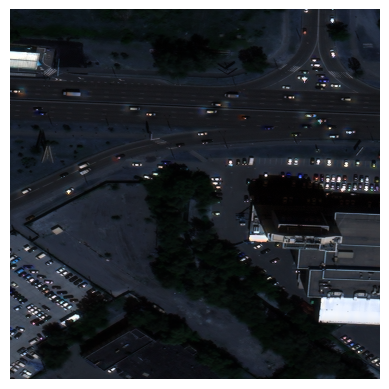

In [4]:
target_id = np.load(f'{check_point_dir}/target_image_id.npy')
target = coco.loadImgs(target_id)[0]
image = plt.imread(f'{coco_image_dir}/{target["file_name"]}')
plt.imshow(image)
plt.axis('off')
plt.show()
plt.imsave(f'{check_point_dir}/target_image.png', image)

### Plot the bounding box

In [5]:
boxes = np.load(f'{check_point_dir}/target_boxes.npy')
image = Image.open(f'{coco_image_dir}/{target["file_name"]}')

draw = ImageDraw.Draw(image)
for box in boxes:
    # box: [x, y, w, h] in percentage
    x, y, w, h = box
    x, y, w, h = x * target['width'], y * target['height'], w * target['width'], h * target['height']
    draw.rectangle([x - w / 2, y - h / 2, x + w / 2, y + h / 2], outline='red', width=2)
image.save(f'{check_point_dir}/target_boxes.png')
image.show()

### Plot backbone weights
shape: 256, (shape code)

In [4]:
backbone = np.load(f'{check_point_dir}/backbone_{shape_code}.npy')[0]
os.makedirs(f'{check_point_dir}/backbone_{shape_code}', exist_ok=True)

# save 256 images with bar
for i in range(256):
    plt.imshow(backbone[i])
    plt.colorbar()
    plt.savefig(f'{check_point_dir}/backbone_{shape_code}/{i}.png')
    plt.close()

### Plot encoder weights

shape: 53294, 256

index range:
- 0: [0, 40000]
- 1: [40000, 50000]
- 2: [50000, 52500]
- 3: [52500, 53125]
- 4: [53125, 53294]

In [5]:
data = np.load(f'{check_point_dir}/enc.npy')[0]
data = [data[0:40000], data[40000:50000], data[50000:52500], data[52500:53125], data[53125:53294]]
os.makedirs(f'{check_point_dir}/enc_{shape_code}', exist_ok=True)

for i in range(256):
    plt.imshow(data[shape_code][:, i].reshape(200, 200))  # modify this
    plt.colorbar()
    plt.savefig(f'{check_point_dir}/enc_{shape_code}/{i}.png')
    plt.close()

### Plot CCM weights

shape: 256, 200, 200 (no shape code)

In [6]:
shape_code = 0  # modify this
data = np.load(f'{check_point_dir}/ccm.npy')[0]
os.makedirs(f'{check_point_dir}/ccm', exist_ok=True)

for i in range(256):
    plt.imshow(data[i])
    plt.colorbar()
    plt.savefig(f'{check_point_dir}/ccm/{i}.png')
    plt.close()

### Plot channel gate weights

shape: 256, (shape code)

In [7]:
data = np.load(f'{check_point_dir}/channelgate_{shape_code}.npy')[0]
os.makedirs(f'{check_point_dir}/channelgate_{shape_code}', exist_ok=True)

for i in range(256):
    plt.imshow(data[i])
    plt.colorbar()
    plt.savefig(f'{check_point_dir}/channelgate_{shape_code}/{i}.png')
    plt.close()

### Plot spatial gate weights

shape: 1, (shape code)

In [8]:
data = np.load(f'{check_point_dir}/spatialgate_{shape_code}.npy')[0]
os.makedirs(f'{check_point_dir}/spatialgate_{shape_code}', exist_ok=True)

plt.imshow(data[0])
plt.colorbar()
plt.savefig(f'{check_point_dir}/spatialgate_{shape_code}/0.png')
plt.close()

### Plot CGFE weights

shape: 53294, 256

In [9]:
data = np.load(f'{check_point_dir}/cgfe.npy')[0]
os.makedirs(f'{check_point_dir}/cgfe_{shape_code}', exist_ok=True)

data = [data[0:40000], data[40000:50000], data[50000:52500], data[52500:53125], data[53125:53294]]
for i in range(256):
    plt.imshow(data[shape_code][:, i].reshape(200, 200))  # modify this
    plt.colorbar()
    plt.savefig(f'{check_point_dir}/cgfe_{shape_code}/{i}.png')
    plt.close()

### Combine images into an image horizontally

In [10]:
os.makedirs(f'{check_point_dir}/combined_{shape_code}', exist_ok=True)

for combined_id in range(256):
    images = [Image.open(f'{check_point_dir}/enc_{shape_code}/{combined_id}.png'),
              Image.open(f'{check_point_dir}/cgfe_{shape_code}/{combined_id}.png')]
    widths, heights = zip(*(i.size for i in images))

    total_width = sum(widths)
    max_height = max(heights)

    new_im = Image.new('RGB', (total_width, max_height))
    x_offset = 0
    for im in images:
        new_im.paste(im, (x_offset, 0))
        x_offset += im.size[0]
    new_im.save(f'{check_point_dir}/combined_{shape_code}/{combined_id}.png')

### Plot decoder weights

shape: 900, 256

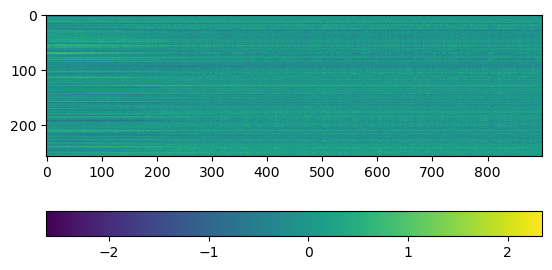

In [13]:
data = np.load(f'{check_point_dir}/dec.npy')[0]
os.makedirs(f'{check_point_dir}/dec_{shape_code}', exist_ok=True)

plt.imshow(data.T)
plt.colorbar(location='bottom')
plt.savefig(f'{check_point_dir}/dec_{shape_code}/0.png')